In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Algorithm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV #For hyperparameter training
from sklearn.model_selection import RandomizedSearchCV

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# ROC CURVE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Intro-AI final project/german_credit_data.csv')

In [51]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [52]:
df.describe().round(4)

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000
mean,499.5000,35.5460,1.9040,3271.2580,20.9030
std,288.8194,11.3755,0.6536,2822.7369,12.0588
min,0.0000,19.0000,0.0000,250.0000,4.0000
25%,249.7500,27.0000,2.0000,1365.5000,12.0000
50%,499.5000,33.0000,2.0000,2319.5000,18.0000
75%,749.2500,42.0000,2.0000,3972.2500,24.0000
max,999.0000,75.0000,3.0000,18424.0000,72.0000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [8]:
#Create list format
columns_data = df.columns.values.tolist()
columns_data

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

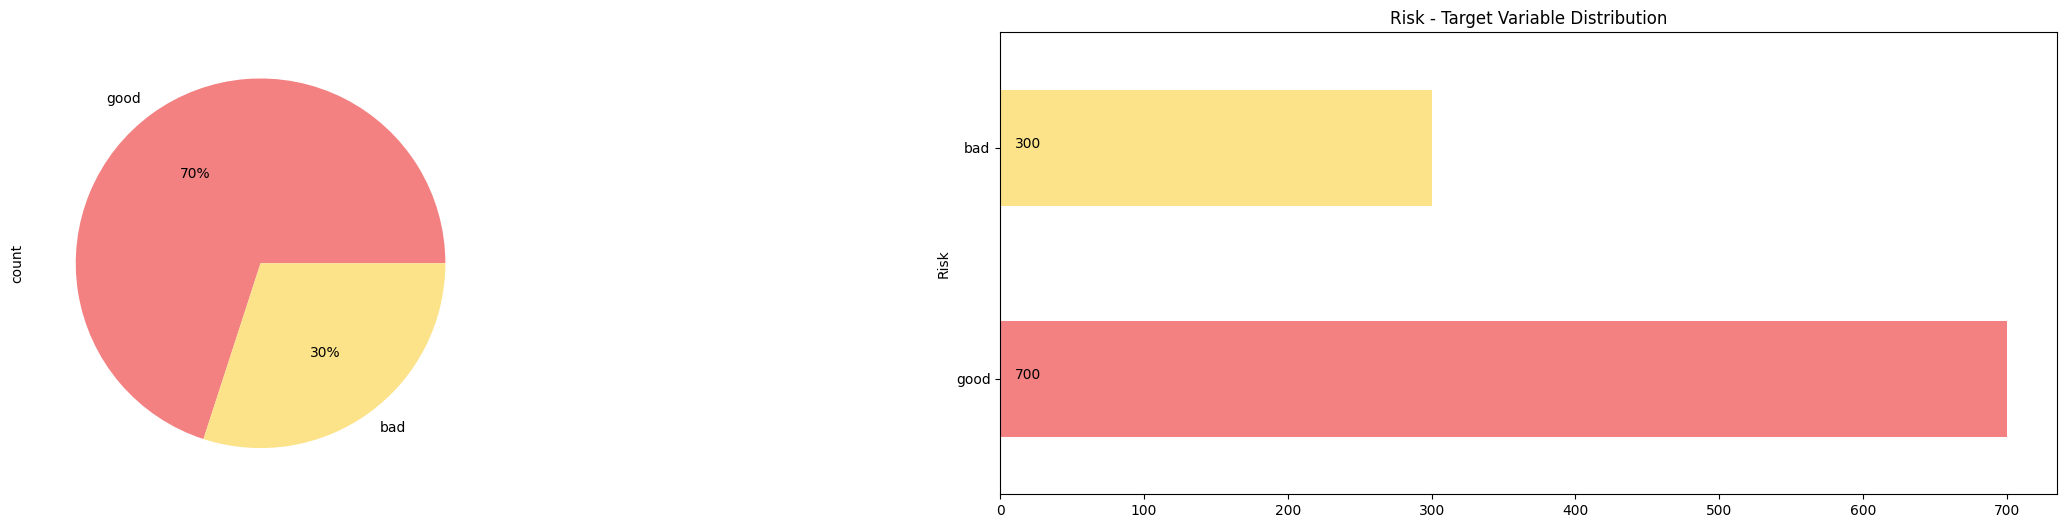

In [9]:
# Let's see how Target feature is distributed
plt.figure(figsize=(30,6))
plt.subplot(121)
df.Risk.value_counts().plot(kind='pie', autopct = "%1.0f%%", colors=['#F38181','#FCE38A'])
plt.subplot(122)
ax = df.Risk.value_counts().plot(kind='barh', color=['#F38181','#FCE38A'])
for i,j in enumerate(df['Risk'].value_counts().values):
    ax.text(10,i,j)
plt.title('Risk - Target Variable Distribution')
plt.show()

<ipython-input-10-4ede4d4cd7ef>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap('tab20')  # This colormap has 20 distinct colors


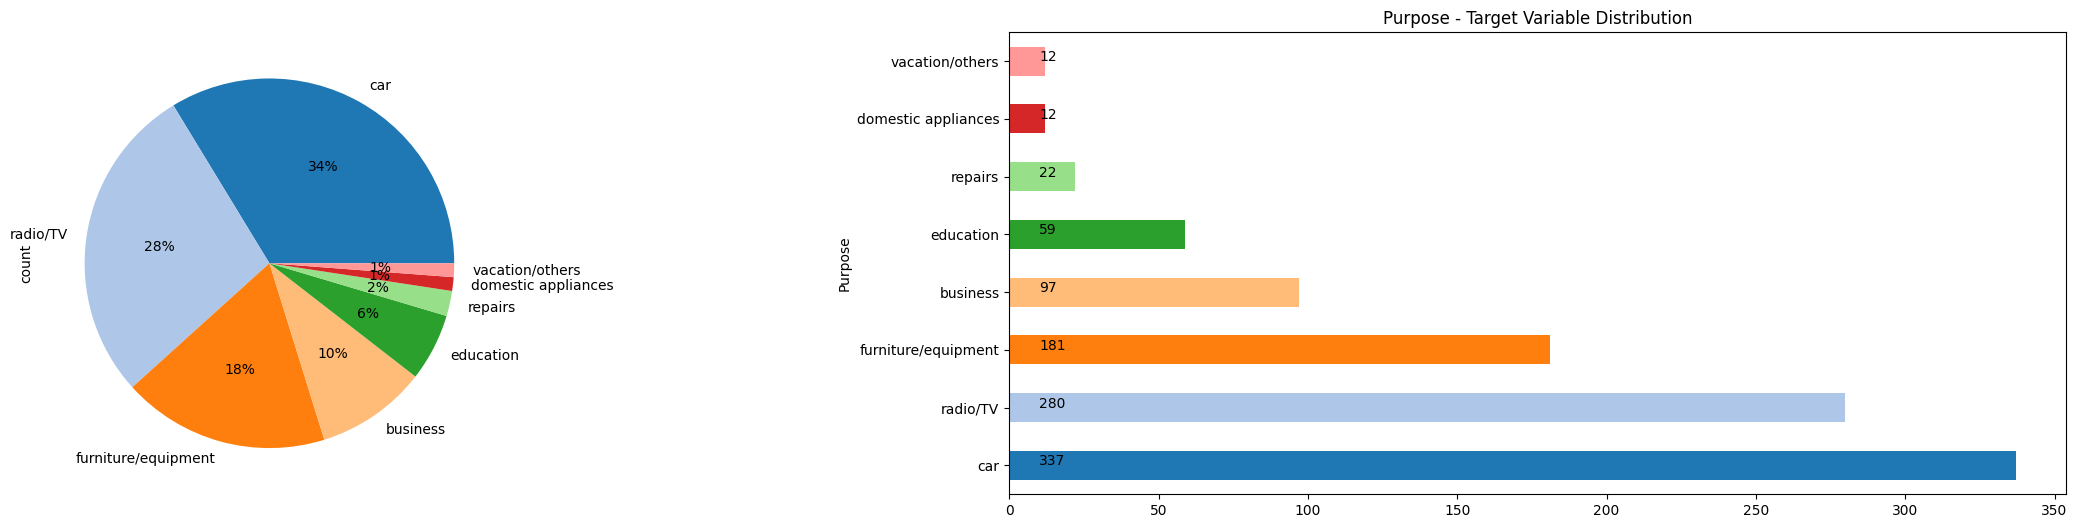

In [10]:
# Let's see how Target feature is distributed
from matplotlib.cm import get_cmap
# Get a colormap and generate colors
colormap = get_cmap('tab20')  # This colormap has 20 distinct colors
colors = [colormap(i) for i in range(len(df['Purpose'].unique()))]

plt.figure(figsize=(30,6))
plt.subplot(121)
df.Purpose.value_counts().plot(kind='pie', autopct = "%1.0f%%", colors=colors)
plt.subplot(122)
ax = df.Purpose.value_counts().plot(kind='barh', color=colors)
for i,j in enumerate(df['Purpose'].value_counts().values):
    ax.text(10,i,j)
plt.title('Purpose - Target Variable Distribution')
plt.show()

In [11]:
###data type

# which columns are object
data_obj_cols = list(df.select_dtypes(include='object'))
print('data_obj_cols : ',len(data_obj_cols))

# the nunmeric type
data_numeric_cols = list(df.select_dtypes(include=['float64','int64']))
print('data_numeric_cols : ',len(data_numeric_cols))

data_obj_cols :  6
data_numeric_cols :  4


In [12]:
def distributionGraphs(x):
    print("\033[1m\033[1;3mDistribution Based on "+str(x)+"\033[0m")
    print('Description : ',columns_data[(columns_data == 'current_data') & (columns_data == x)],'\n')

    #Create a normalized value count converted to percentage
    target_group = round(df.groupby('Risk')[x].value_counts(normalize=True,sort=False)*100)

    #cnt = int((target_group.count()))
    cnt = int((target_group.count()/2))

    all_colr = ['#F38181','#FCE38A','#EAFFD0','#95E1D3','#EEEEEE','#00ADB5']
    colors = all_colr[:cnt]
    plt.figure(figsize=(30,6))

    plt.subplot(121)
    plt.title(str(x)+' Distribution grouped by Target')
    ax = target_group.plot(kind='bar',color=colors)

    # A method to print values in Bar
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + bar.get_height()/2, str(bar.get_height()))

    plt.subplot(122)
    plt.title(str(x)+' distribution in Overall Records')
    (df[x].value_counts(normalize=True)*100).plot(kind='pie', autopct = "%1.0f%%", colors=colors)
    plt.ylabel(' ')

    plt.show()

    print("\033[1m\033[1;3mTable View\033[0m")
    print(target_group)
    print("\n\n")

Distribution Based on Sex
Description :  Age 



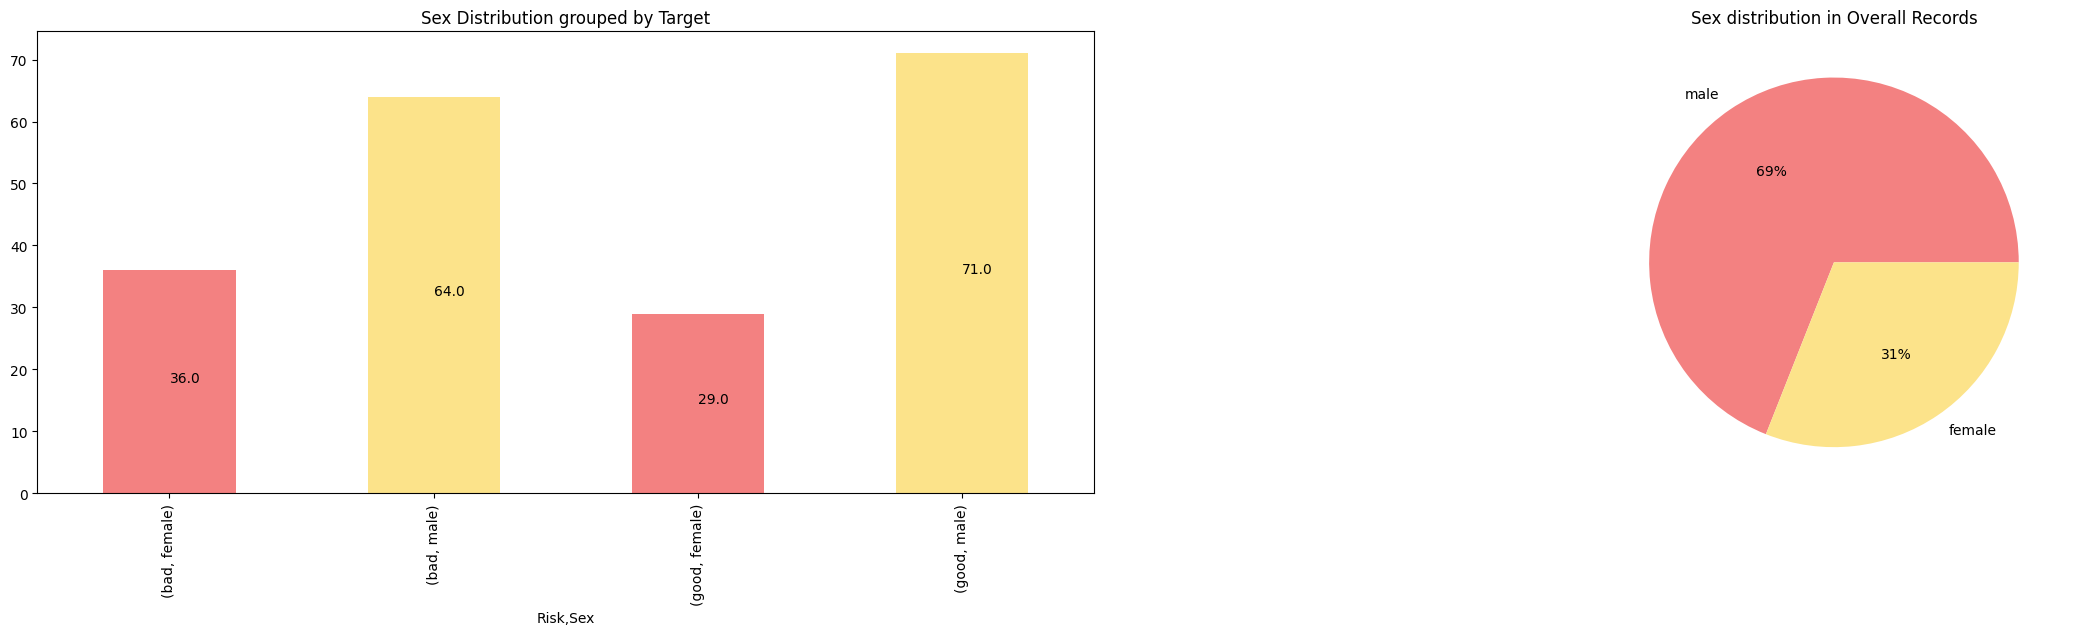

Table View
Risk  Sex   
bad   female    36.0
      male      64.0
good  female    29.0
      male      71.0
Name: proportion, dtype: float64



Distribution Based on Housing
Description :  Age 



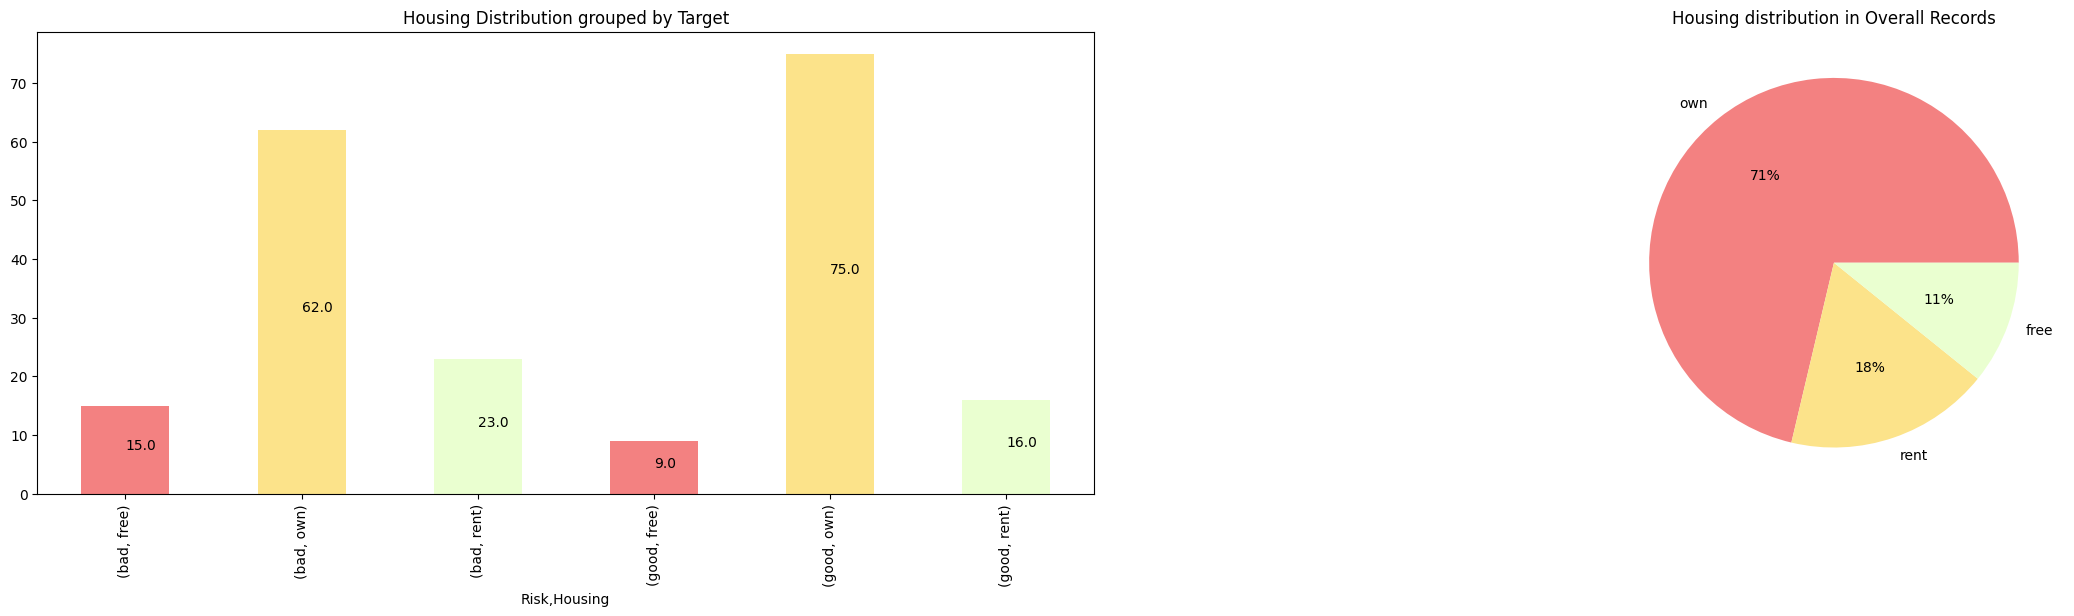

Table View
Risk  Housing
bad   free       15.0
      own        62.0
      rent       23.0
good  free        9.0
      own        75.0
      rent       16.0
Name: proportion, dtype: float64



Distribution Based on Saving accounts
Description :  Age 



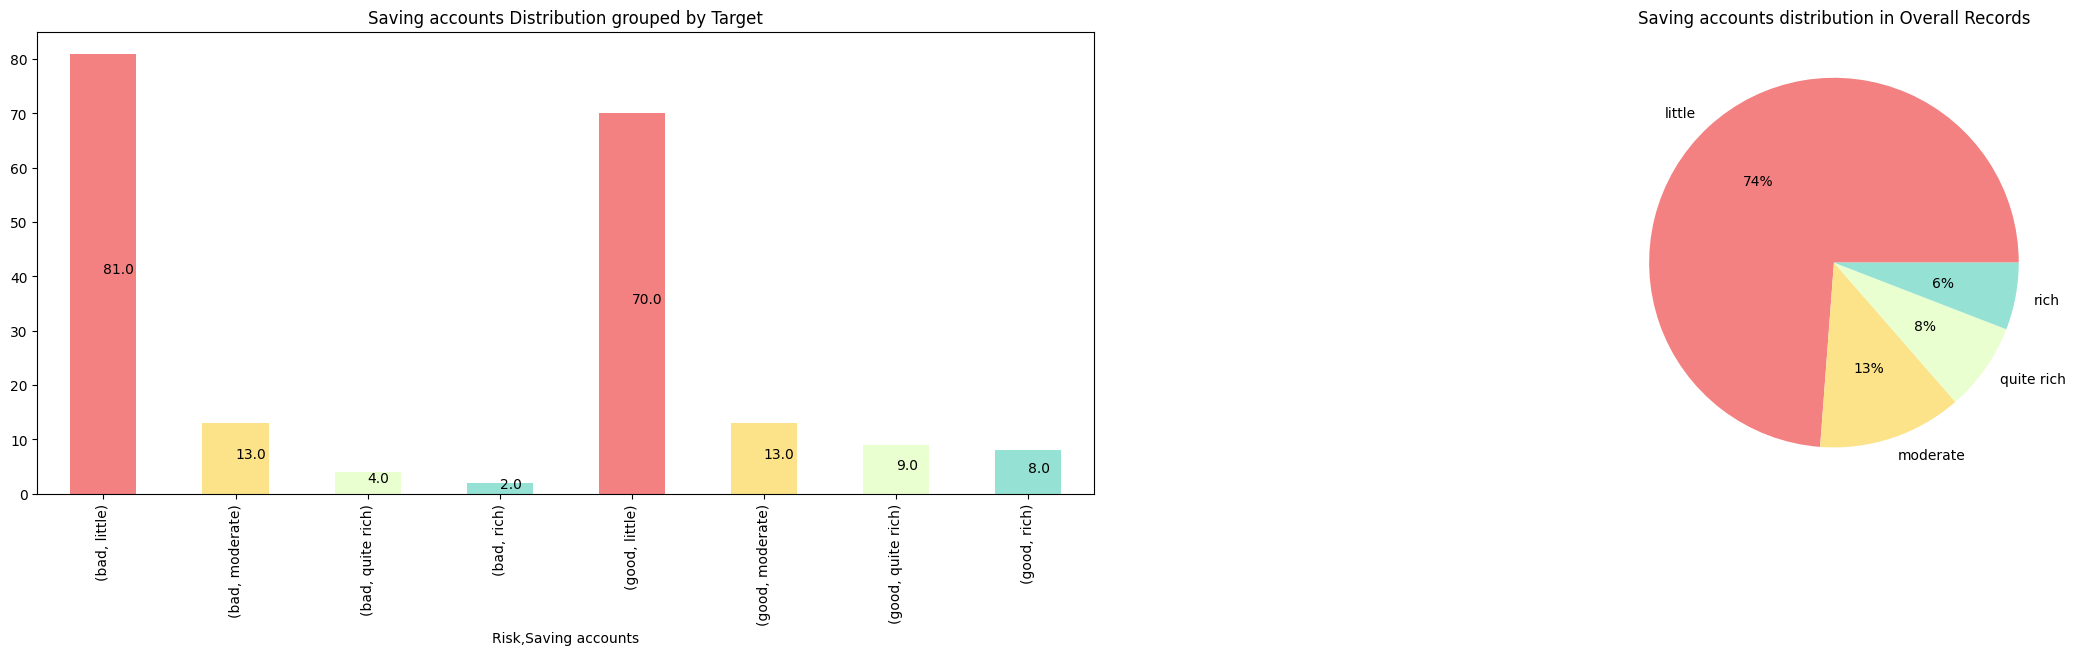

Table View
Risk  Saving accounts
bad   little             81.0
      moderate           13.0
      quite rich          4.0
      rich                2.0
good  little             70.0
      moderate           13.0
      quite rich          9.0
      rich                8.0
Name: proportion, dtype: float64



Distribution Based on Checking account
Description :  Age 



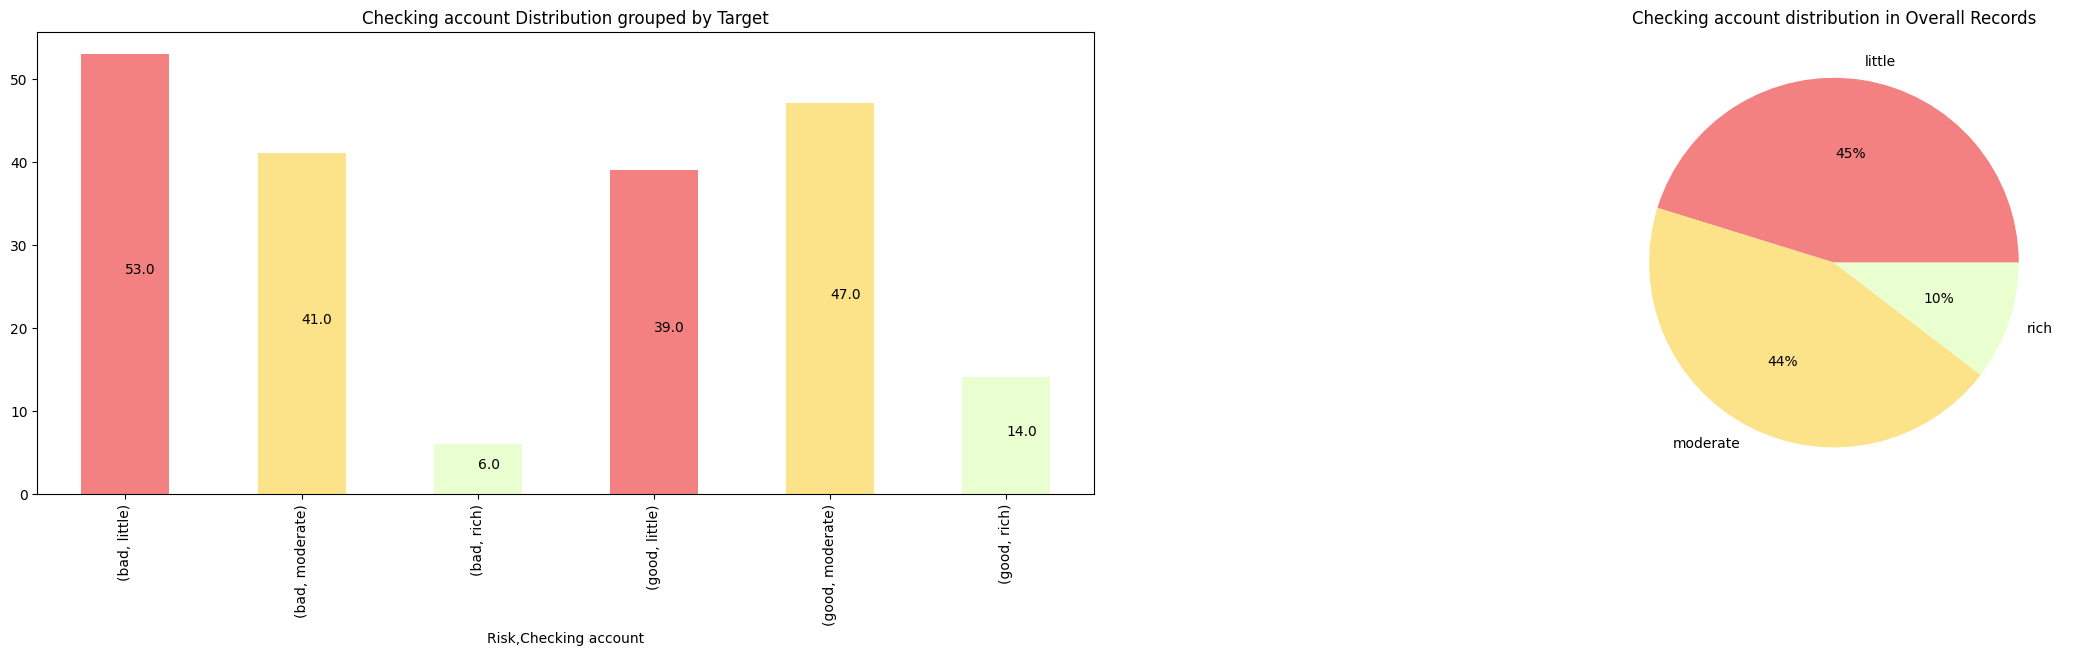

Table View
Risk  Checking account
bad   little              53.0
      moderate            41.0
      rich                 6.0
good  little              39.0
      moderate            47.0
      rich                14.0
Name: proportion, dtype: float64



Distribution Based on Purpose
Description :  Age 



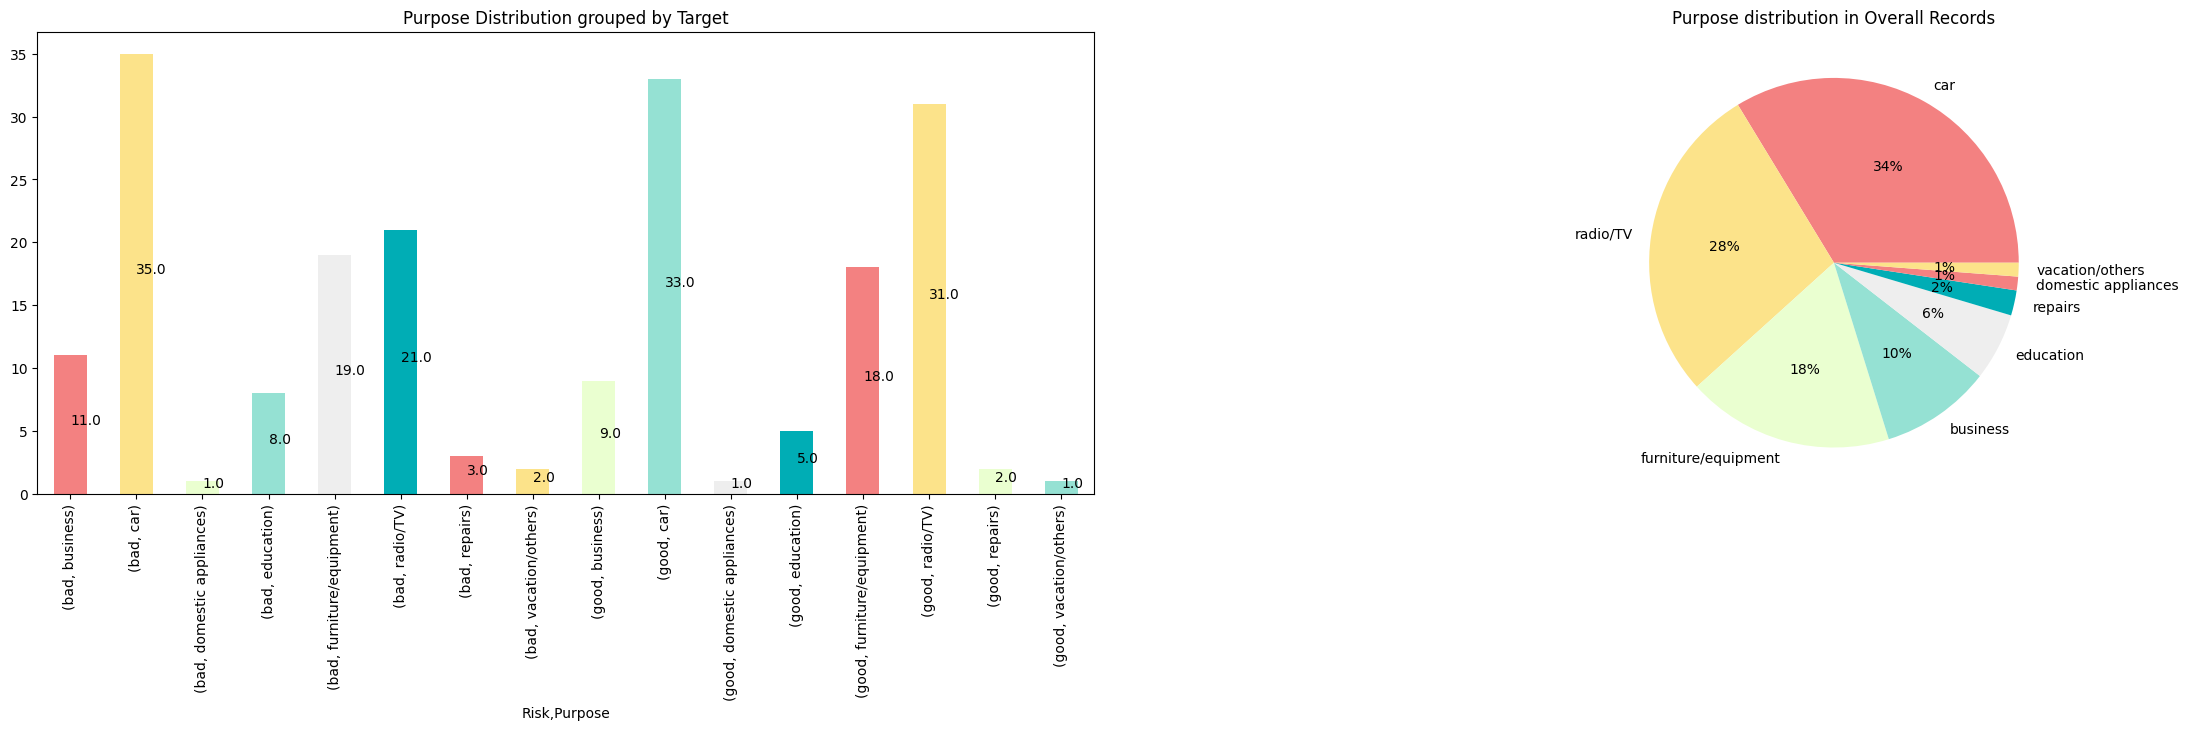

Table View
Risk  Purpose            
bad   business               11.0
      car                    35.0
      domestic appliances     1.0
      education               8.0
      furniture/equipment    19.0
      radio/TV               21.0
      repairs                 3.0
      vacation/others         2.0
good  business                9.0
      car                    33.0
      domestic appliances     1.0
      education               5.0
      furniture/equipment    18.0
      radio/TV               31.0
      repairs                 2.0
      vacation/others         1.0
Name: proportion, dtype: float64





In [13]:
for feature in data_obj_cols[:-1]: #add column list numbers to control [1:2]
    distributionGraphs(feature)

# ***Data Preprocessing***

In [14]:
# Change data type
df[['Job']]=df[['Job']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [15]:
# Using value_counts function to count frequency in categorical column
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Job']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Housing']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Saving accounts']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Checking account']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Purpose']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Risk']].value_counts(sort=True))
print('+-----------------------+')

Sex   
male      690
female    310
Name: count, dtype: int64
+-----------------------+
Job
2      630
1      200
3      148
0       22
Name: count, dtype: int64
+-----------------------+
Housing
own        713
rent       179
free       108
Name: count, dtype: int64
+-----------------------+
Saving accounts
little             603
moderate           103
quite rich          63
rich                48
Name: count, dtype: int64
+-----------------------+
Checking account
little              274
moderate            269
rich                 63
Name: count, dtype: int64
+-----------------------+
Purpose            
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64
+-----------------------+
Risk
good    700
bad     300
Name: count, dtype: int64
+-----------------------+


In [16]:
# 2.1 Deal with missing value by dropping it
new_df=df.dropna(axis=0, how='any')
new_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    object
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
 9   Risk              522 non-null    object
dtypes: int64(3), object(7)
memory usage: 44.9+ KB


In [18]:
new_df.describe().round(4)

,Age,Credit amount,Duration
count,522.0000,522.0000,522.0000
mean,34.8889,3278.7452,21.3391
std,11.7879,2929.1552,12.4741
min,19.0000,276.0000,6.0000
25%,26.0000,1297.5000,12.0000
50%,31.5000,2326.5000,18.0000
75%,41.0000,3971.2500,26.7500
max,75.0000,18424.0000,72.0000


In [19]:
# 2.2 Using unique function to check category label
print('Sex',new_df['Sex'].unique())
print('Job',new_df['Job'].unique())
print('Housing',new_df['Housing'].unique())
print('Saving accounts',new_df['Saving accounts'].unique())
print('Checking account',new_df['Checking account'].unique())
print('Purpose',new_df['Purpose'].unique())
print('Risk',new_df['Risk'].unique())

Sex ['female' 'male']
Job ['2' '3' '1' '0']
Housing ['own' 'free' 'rent']
Saving accounts ['little' 'moderate' 'quite rich' 'rich']
Checking account ['moderate' 'little' 'rich']
Purpose ['radio/TV' 'furniture/equipment' 'car' 'business' 'domestic appliances'
 'repairs' 'vacation/others' 'education']
Risk ['bad' 'good']


In [20]:
#2.3 Using pd.get_dummies function to generate dummies
dummied_new_df=pd.get_dummies(new_df,columns=['Sex','Job','Housing','Saving accounts', \
                                            'Checking account', 'Purpose', 'Risk'])
dummied_new_df

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
1,22,5951,48,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,45,7882,42,False,True,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,True
4,53,4870,24,False,True,False,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
7,35,6948,36,False,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
9,28,5234,30,False,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,1743,24,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
993,30,3959,36,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
996,40,3857,30,False,True,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
998,23,1845,45,False,True,False,False,True,False,True,...,False,False,False,False,False,True,False,False,True,False


In [61]:
dummied_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          522 non-null    int64
 1   Credit amount                522 non-null    int64
 2   Duration                     522 non-null    int64
 3   Sex_female                   522 non-null    bool 
 4   Sex_male                     522 non-null    bool 
 5   Job_0                        522 non-null    bool 
 6   Job_1                        522 non-null    bool 
 7   Job_2                        522 non-null    bool 
 8   Job_3                        522 non-null    bool 
 9   Housing_free                 522 non-null    bool 
 10  Housing_own                  522 non-null    bool 
 11  Housing_rent                 522 non-null    bool 
 12  Saving accounts_little       522 non-null    bool 
 13  Saving accounts_moderate     522 non-null    bool 
 14 

# ***Data Scaling***

In [21]:
#minimax scaling

MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=dummied_new_df.columns
scaled_data.head()

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,0.053571,0.312707,0.636364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464286,0.419110,0.545455,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.607143,0.253141,0.272727,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.285714,0.367644,0.454545,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.160714,0.273198,0.363636,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
#set x (make prediction) with minimax
scaled_x=scaled_data.drop(['Risk_bad','Risk_good'],axis=1).copy()

#set y (want to predict)
scaled_y=scaled_data['Risk_good'].copy()
scaled_y=scaled_y.astype(int)

In [23]:
#prepare dataset with scaling
#Split the data (split into 80% training data & 20% testing data)
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test= \
train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=4)

In [63]:
print('scaled_y_train:',Counter(scaled_y_train))
print('------------------------------------')
print('scaled_y_test :',Counter(scaled_y_test))

scaled_y_train: Counter({1: 232, 0: 185})
------------------------------------
scaled_y_test : Counter({1: 59, 0: 46})


In [25]:
# 6.3 Fit the model with KNeighborsClassifier function
scaling_model=KNeighborsClassifier(weights='uniform',n_neighbors=5,algorithm='auto',metric='minkowski',p=2)
scaling_model.fit(scaled_x_train,scaled_y_train)
print(scaling_model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [40]:
# 6.4 Show result: out-of-sample testing
# Training result
training_prediction=scaling_model.predict(scaled_x_train)
# Accuracy
training_acc=accuracy_score(scaled_y_train,training_prediction)
# f1 score
training_f1s=f1_score(scaled_y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(scaled_y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(scaled_y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(scaled_y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(scaled_y_train,training_prediction)

# Testing result
testing_prediction=scaling_model.predict(scaled_x_test)
testing_acc=accuracy_score(scaled_y_test,testing_prediction)
testing_f1s=f1_score(scaled_y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(scaled_y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(scaled_y_test,testing_prediction)

# print result
print('With scaling')
print('+========================+')
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

With scaling
+========================+
Training result:
Training ACC: 69.54
Training f1s: 73.92
Training pre: 70.59
Training sen: 77.59
Training spe: 59.46

Training confusion matrix:
[[110  75]
 [ 52 180]]
Testing result:
Testing ACC: 63.81
Testing f1s: 69.84
Testing pre: 65.67
Testing sen: 74.58
Testing spe: 50.0

Testing confusion matrix:
[[23 23]
 [15 44]]


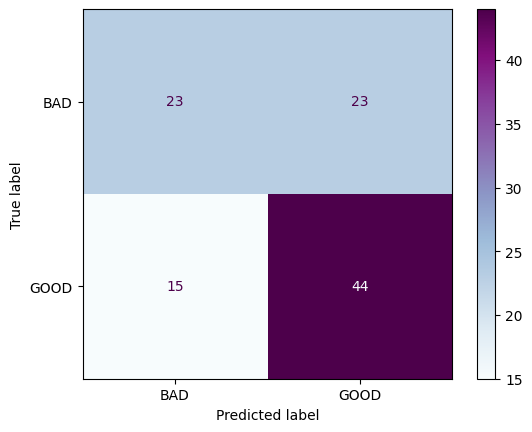

In [41]:
plot_cm = confusion_matrix(scaled_y_test, testing_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=plot_cm, display_labels=["BAD","GOOD"])
disp.plot(cmap='BuPu')
plt.show()

In [27]:
tuning_model = KNeighborsClassifier()

In [53]:
param_grid = [
    {
        'n_neighbors': np.arange(1, 31),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto'],
        'metric': ['minkowski'],
        'p': [0.5, 1, 2, 3],
        'leaf_size': np.arange(20, 41, 5)
    },
    {
        'n_neighbors': np.arange(1, 31),
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto'],
        'metric': ['manhattan'],
        'leaf_size': np.arange(20, 41, 5)
    }
]

In [54]:
grid_search = GridSearchCV(estimator=tuning_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [55]:
grid_search.fit(scaled_x_train, scaled_y_train)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.53674699 ... 0.60401606 0.5777969  0.60154905]
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto'],
                          'leaf_size': array([20, 25, 30, 35, 40]),
                          'metric': ['minkowski'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                          'p': [0.5, 1, 2, 3],
                          'weights': ['uniform', 'distance']},
                         {'algorithm': ['auto'],
                          'leaf_size': array([20, 25, 30, 35, 40]),
                          'metric': ['manhattan'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                          'weights': ['uniform', 'distance']}],
             verbose=2)

In [56]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(scaled_x_test, scaled_y_test)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}
Best Score: 0.6138841078600115
Test Set Accuracy: 0.6761904761904762


# ***Final***

In [57]:
final_model = KNeighborsClassifier(weights='uniform',n_neighbors=20, algorithm='auto', metric='minkowski', leaf_size=20,p=2, n_jobs=-1)
final_model.fit(scaled_x_test,scaled_y_test)
print(final_model.get_params())

{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}


In [58]:
# Testing result
testing_prediction=final_model.predict(scaled_x_test)
testing_acc=accuracy_score(scaled_y_test,testing_prediction)
testing_f1s=f1_score(scaled_y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(scaled_y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(scaled_y_test,testing_prediction)


print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 60.0
Testing f1s: 67.19
Testing pre: 62.32
Testing sen: 72.88
Testing spe: 43.48

Testing confusion matrix:
[[20 26]
 [16 43]]


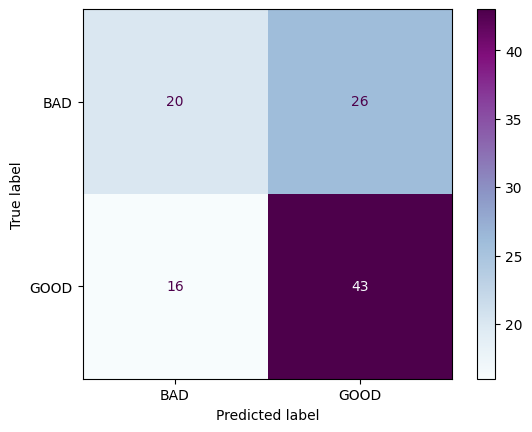

In [59]:
plot_cm = confusion_matrix(scaled_y_test, testing_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=plot_cm, display_labels=["BAD","GOOD"])
disp.plot(cmap='BuPu')
plt.show()